In [7]:
import numpy as np
import os
import lasagne
import time
from nbfinder import NotebookFinder
import sys
sys.meta_path.append(NotebookFinder())
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import patches

#from helper_fxns import early_stop

#import data_loader
#from data_loader import load_classification_dataset, load_detection_dataset
#from build_hur_detection_network import build_det_network
#from build_hur_classif_network import build_classif_network

In [1]:




def print_val_results(val_err, val_acc, logger):
    logger.info("  validation loss:\t\t{:.6f}".format(val_err))
    logger.info("  validation accuracy:\t\t{:.2f} %".format(val_acc * 100))



            

def plot_ims_with_boxes(ims, pred_bboxes, gt_bboxes, sanity_boxes=None, epoch=0,save_plots=False,path=None):
    #bbox of form center x,y,w,h
    n_ims = ims.shape[0]
    channels = ims.shape[1]
    plt.figure(1, figsize=(80,80))
    
    #sanity boxes is the original bounding boxes
    if sanity_boxes is not None:
        assert np.isclose(gt_bboxes, sanity_boxes).all()

    count=0
    for i in range(n_ims):
        for j in range(channels):  
            count+= 1
            sp = plt.subplot(n_ims,channels, count)
            sp.imshow(ims[i,j])
            add_bbox(sp, pred_bboxes[i], color='r')
            add_bbox(sp, gt_bboxes[i], color='g')
    if save_plots:
        plt.savefig("%s/epoch_%i_boxes.png"%(path,epoch))
        plt.savefig("%s/boxes.png"%(path))
        plt.show()
    else:
        plt.show()


def add_bbox(subplot, bbox, color):
    #box of form center x,y  w,h
    x,y,w,h = bbox
    subplot.add_patch(patches.Rectangle(
    xy=(x - w / 2. , y - h / 2.),
    width=w,
    height=h, lw=2,
    fill=False, color=color))
    
def add_bbox_old(subplot,bbox,color):
    xmin,ymin,xmax, ymax = bbox
    subplot.add_patch(patches.Rectangle(
    xy=(xmin,ymin),
    width=xmax - xmin,
    height=ymax - ymin,
    fill=False, color=color))
    

In [4]:
if __name__=="__main__":
    from build_hur_classif_network import build_classif_network


    _,_,inp,cn = build_classif_network(dropout_p=0)

    train_fn, val_fn,box_fn,network = build_det_network(cn, inp)

    x_tr, grid_tr,bbox_tr, _,_,_,_,_,_ = load_detection_dataset(num_ims=40, with_boxes=True)
    

Building model and compiling functions...
Building model and compiling functions...


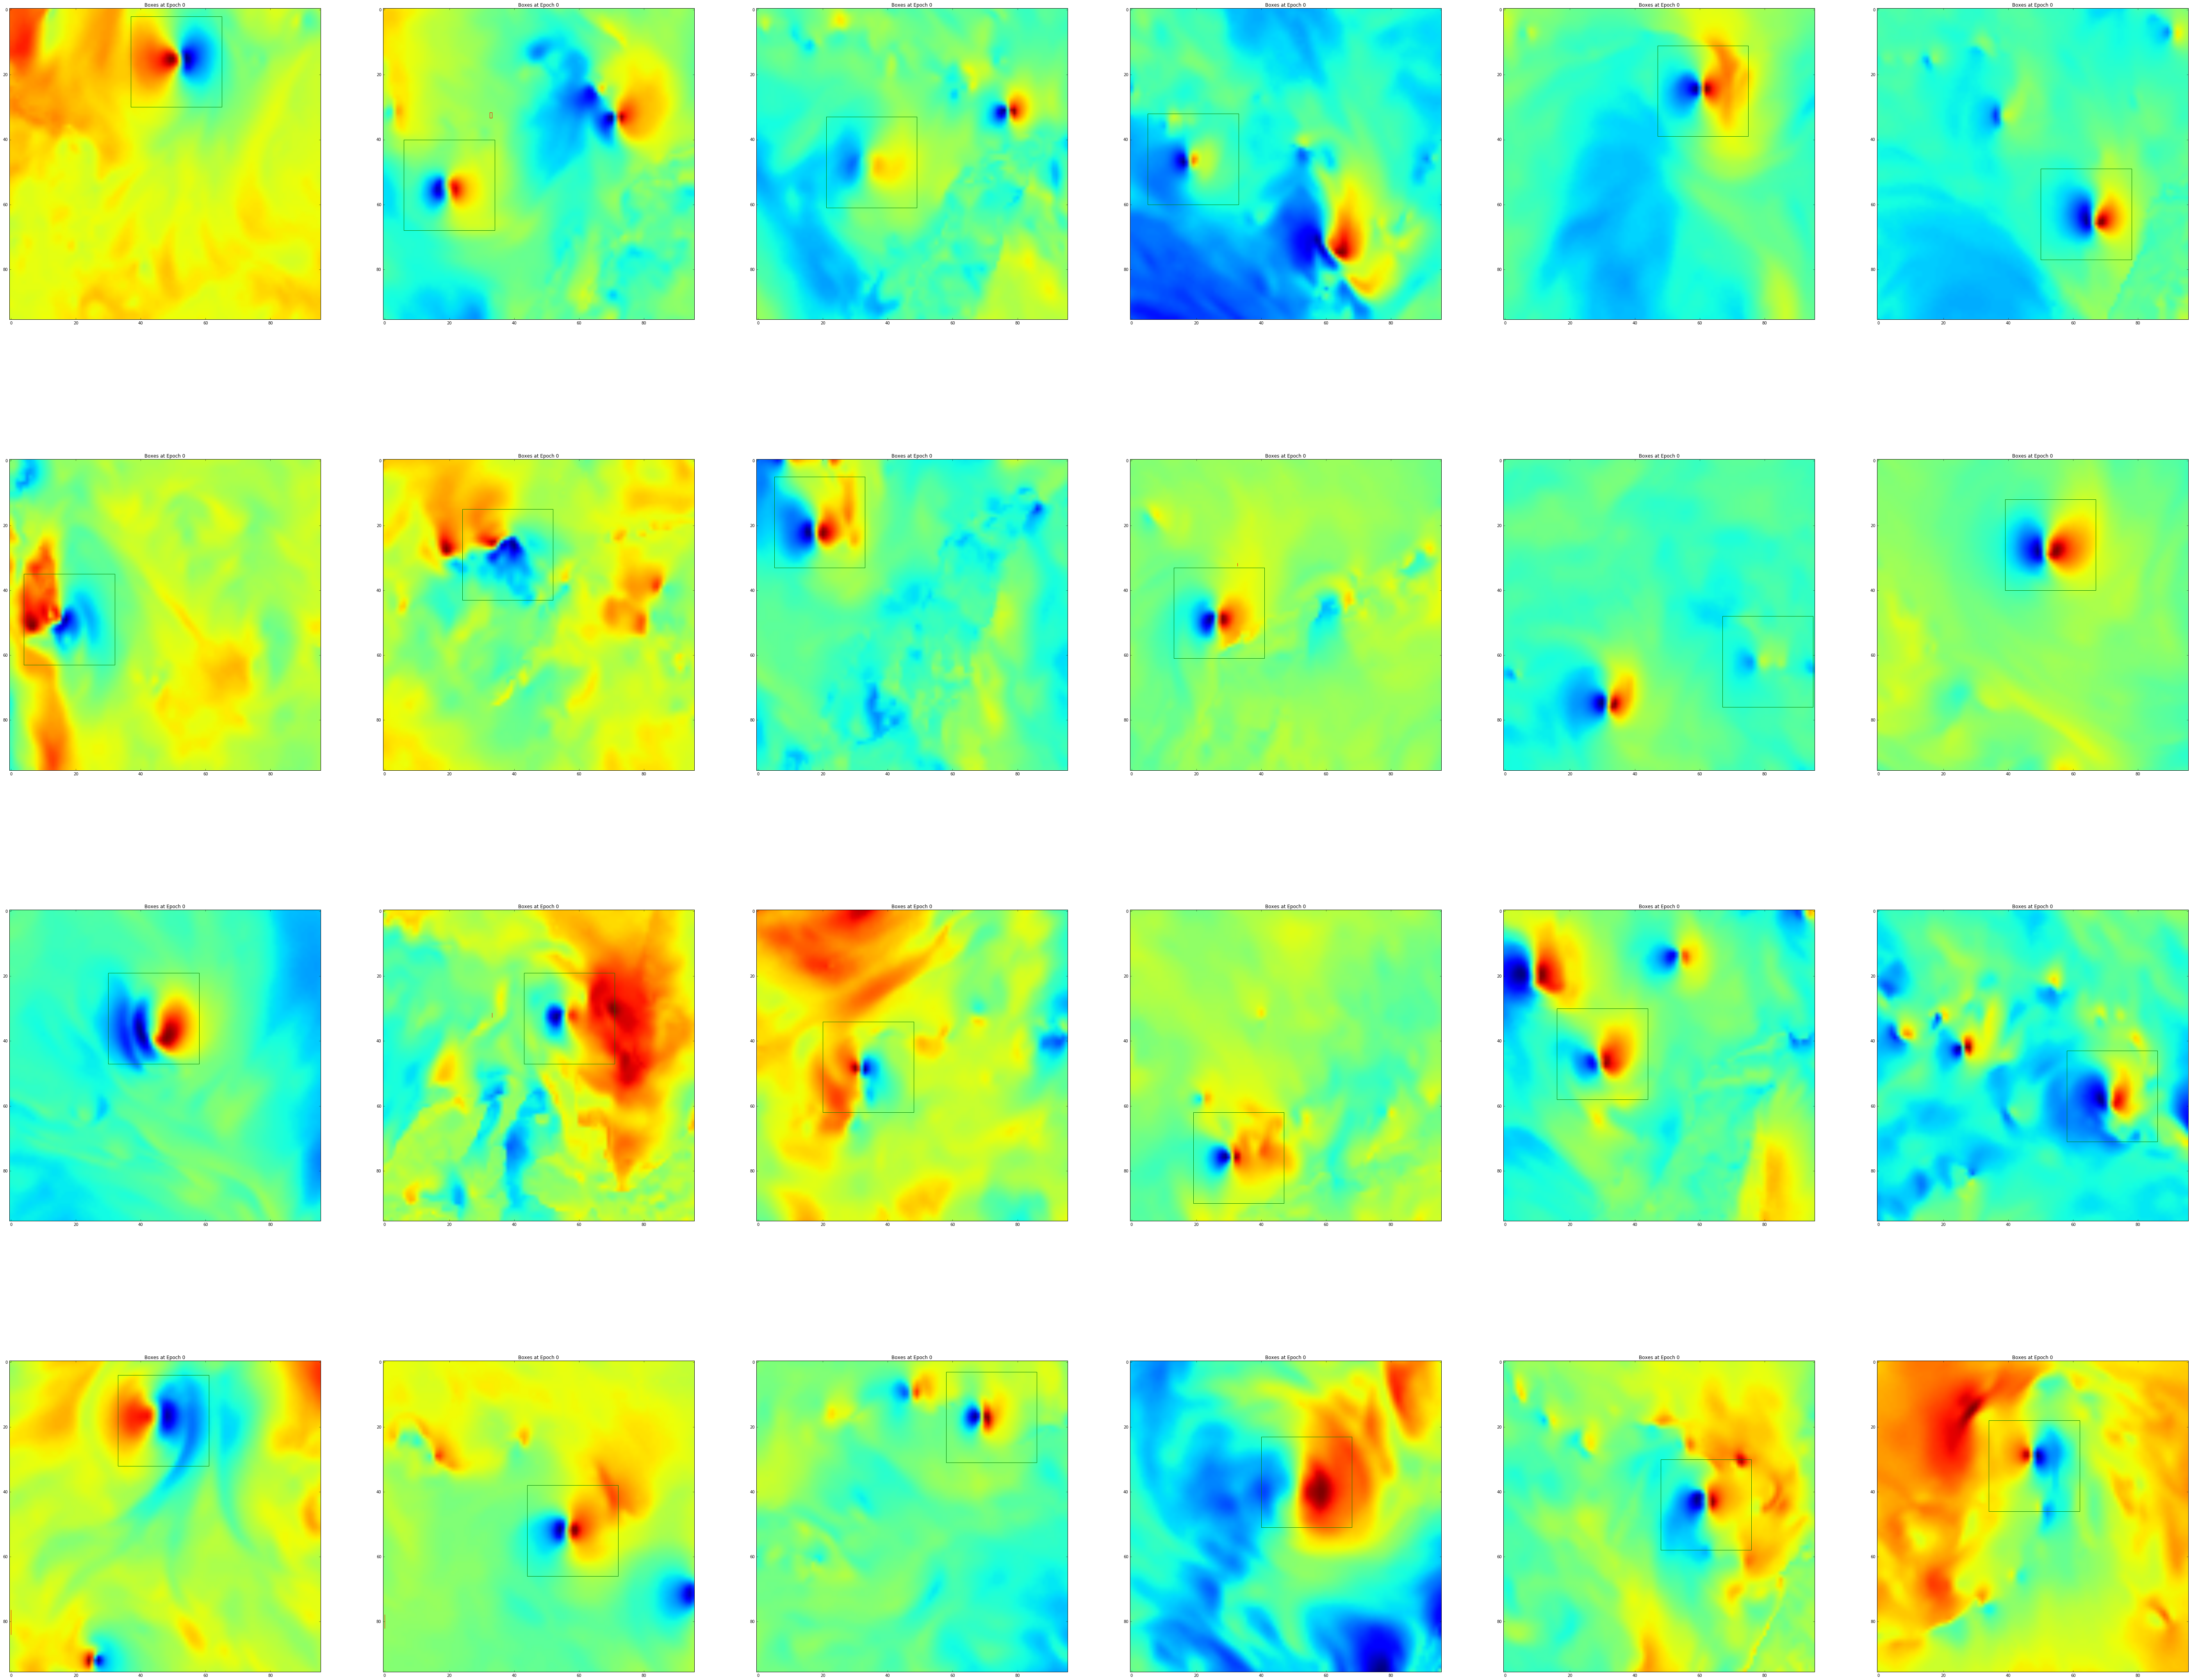

In [6]:
if __name__=="__main__":
    pb ,gtb = box_fn(x_tr,grid_tr)
    assert np.isclose(gtb, bbox_tr).all()
    plot_ims_with_boxes(x_tr[:,1],pb,gtb)

In [24]:
# a,b,c,d = b[10]